<a id='baitap4'></a>
# 4. Bài tập 4: Human Dataset

- Mục tiêu: Gom nhóm hình có sự xuất hiện của con người và không có con người. 
- Dataset: INRIA Person Dataset.


In [2]:
# import library
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#plt.gray()
%matplotlib inline

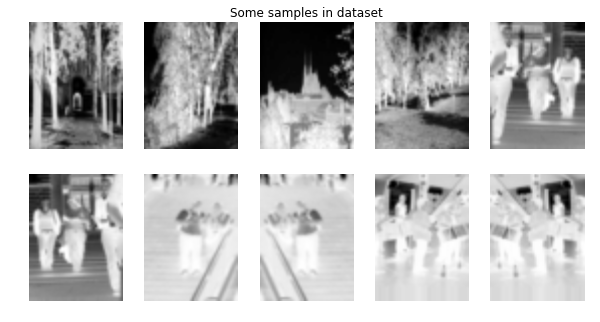

In [3]:
# import library
from scipy import misc
import glob

images = glob.glob('dataset/*.png')
# create a fig to show image
fig = plt.figure(figsize=(10,5))

plt.title('Some samples in dataset')
plt.axis('off')
# for all 0-9 labels
k= 0
for i in range(10):
    # initialize subplots in a grid 2x5 at i+1th position
    if(i==4):
        k+= 600
    image = misc.imread(images[i+k], mode='L')
    ax = fig.add_subplot(2, 5, 1+i) 
    # display image
    ax.imshow(image, cmap=plt.cm.binary)
    
    #don't show the axes
    plt.axis('off')
plt.show()

- Dataset gồm 1044 64x47. Gồm 2 class: 558 hình person và 486 hình non-person
- Tiến hành rút trích HOG feature từ mỗi hình và lưu lại.

<a id='baitap4_feature'></a>
## 4.1 Extract HoG Feature

- Sử dụng hàm HoG của thư viện Skimage để thực hiện rút trích đặc trưng HoG từ mỗi ảnh. 

In [6]:
from skimage.feature import hog
from skimage import data, color, exposure
import numpy as np

target = [] # To get true lable
fds, hog_images = [],[]
for imagePath in images:
    
    if(imagePath[8]=='c'):
        target.append(1)
    else:
        target.append(0)
    
    image = misc.imread(imagePath, mode='L')
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualise=True)
    
    fds.append(fd)
    hog_images.append(hog_image)

# Convert fds, hog_image from list to numpy array
feature_HOG = np.array(fds)
hog_images = np.array(hog_images) 

c:\python34\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


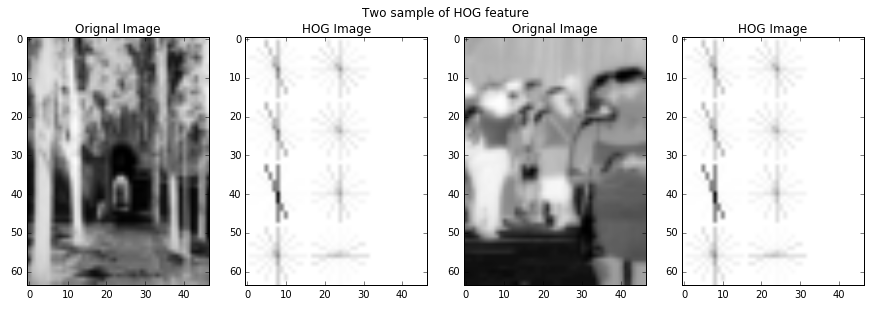

In [7]:
fig = plt.figure(figsize=(15,5))
plt.title('Two sample of HOG feature')
plt.axis('off')

image = misc.imread(images[0], mode='L')
ax = fig.add_subplot(1,4,1)
ax.imshow(image,cmap=plt.cm.binary)
ax.set_title('Orignal Image')
ax = fig.add_subplot(1,4,2)
ax.imshow(hog_images[0],cmap=plt.cm.binary)
ax.set_title('HOG Image')

image = misc.imread(images[800], mode='L')
ax = fig.add_subplot(1,4,3)
ax.imshow(image,cmap=plt.cm.binary)
ax.set_title('Orignal Image')
ax = fig.add_subplot(1,4,4)
ax.imshow(hog_images[0],cmap=plt.cm.binary)
ax.set_title('HOG Image')

plt.show()

In [13]:
#import DBSCAN
from sklearn.cluster import DBSCAN
# import library
from sklearn.cluster import spectral_clustering
from sklearn.metrics.pairwise import cosine_similarity 

# import library
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
TSNE_model = TSNE(learning_rate=100)





In [8]:
from sklearn import metrics
def compareAlgorithm(algorithms, targetLabel, data):
    
    print('#Sample: %d\t#Class: %d\t#feature: %d'%(data.shape[0], len(set(label_kmean)),data.shape[1]))
    print(82*'_')
    print('init\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    for algorithm in algorithms:
        print('%-9s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (algorithm,
                 metrics.homogeneity_score(targetLabel, algorithms[algorithm]),
                 metrics.completeness_score(targetLabel, algorithms[algorithm]),
                 metrics.v_measure_score(targetLabel, algorithms[algorithm]),
                 metrics.adjusted_rand_score(targetLabel, algorithms[algorithm]),
                 metrics.adjusted_mutual_info_score(targetLabel,  algorithms[algorithm]),
                 metrics.silhouette_score(data, algorithms[algorithm],
                                          metric='euclidean',
                                          sample_size=300)))
    print(82*'_')

<a id='baitap4_clustering'></a>
## 4.2 Áp dụng thuật toán KMean, Spectral, Agglomerative Clustering

### KMean

In [10]:
import pandas as pd
model_kmean = KMeans(n_clusters=2)
label_kmean = model_kmean.fit_predict(feature_HOG)

print("Cross Table")
print(50*'_')
df = pd.DataFrame({'label':label_kmean, 'True Label':target})
ct = pd.crosstab(df['label'], df['True Label'])
print(ct)

Cross Table
__________________________________________________
True Label    0    1
label               
0           213  382
1           273  176


###  Spectral Clustering

In [14]:
graph = cosine_similarity(feature_HOG)
label_spectral = spectral_clustering(graph, n_clusters=2)

print("Cross Table")
print(50*'_')
df = pd.DataFrame({'label':label_spectral, 'True Label':target})
ct = pd.crosstab(df['label'], df['True Label'])
print(ct)

Cross Table
__________________________________________________
True Label    0    1
label               
0           276  191
1           210  367


### Agglomerative Clustering

In [15]:
aggModel = AgglomerativeClustering(n_clusters=2)
label_agglomerative = aggModel.fit_predict(feature_HOG)

print("Cross Table")
print(50*'_')
df = pd.DataFrame({'label':label_agglomerative, 'True Label':target})
ct = pd.crosstab(df['label'], df['True Label'])
print(ct)

Cross Table
__________________________________________________
True Label    0    1
label               
0           152   62
1           334  496


- Nhận thấy cả 3 thuật toán đề không cho ra kết quả tốt. Khó xác định giữa 2 class.

### Visualize kết quả

#### PCA

pca = PCA(n_components=2).fit_transform(feature_HOG)

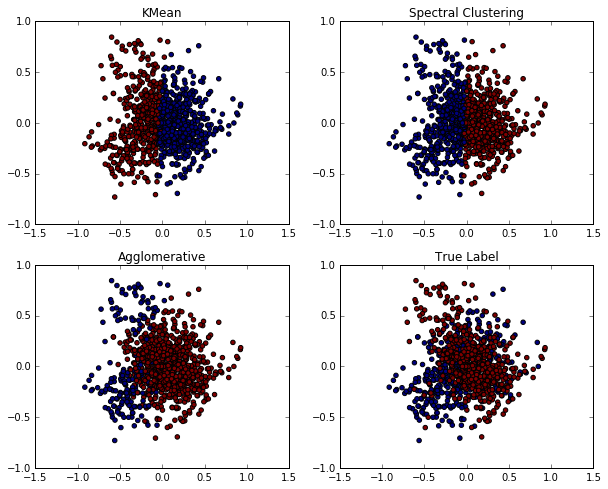

In [17]:
# create a fig to show image
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(2, 2, 1)
ax.scatter(pca[:,0],pca[:,1], c=label_kmean)
ax.set_title('KMean')

ax = fig.add_subplot(2, 2, 2)
ax.scatter(pca[:,0],pca[:,1], c=label_spectral)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(2, 2, 3)
ax.scatter(pca[:,0],pca[:,1], c=label_agglomerative)
ax.set_title('Agglomerative')

ax = fig.add_subplot(2, 2, 4)
ax.scatter(pca[:,0],pca[:,1], c=target)
ax.set_title('True Label')

plt.show()

### T-SNE

In [18]:
tnse = TSNE_model.fit_transform(feature_HOG)

### Evaluate

In [19]:
compareAlgorithm({'KMean':label_kmean, 'Spectral':label_spectral,'Agglomerative':label_agglomerative},\
                 target, feature_HOG)

#Sample: 1044	#Class: 2	#feature: 64
__________________________________________________________________________________
init		homo	compl	v-meas	ARI	AMI	silhouette
Spectral 	0.037	0.038	0.037	0.053	0.037	0.110
Agglomerative	0.046	0.062	0.053	0.056	0.045	0.142
KMean    	0.045	0.045	0.045	0.064	0.044	0.106
__________________________________________________________________________________


### Nhận xét: 
- Kết quả không tốt. Với dữ liệu khó có thể cluster thành 2 nhóm phân biệt person và non-person. 
- Nguyên nhân: có thể do input đầu vào là hình grayscale, một số hình bị quá sáng, mất mát thông tin trong quá trình chuyển ảnh màu sang ảnh grayscale.
